<a href="https://colab.research.google.com/github/BhuvanChaithanya/Automatic-Mathematical-Modelling-AI-/blob/main/NN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [763]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [764]:
def f(x):
  return 3*x**2 - 4*x + 5

In [765]:
f(3.0)

20.0

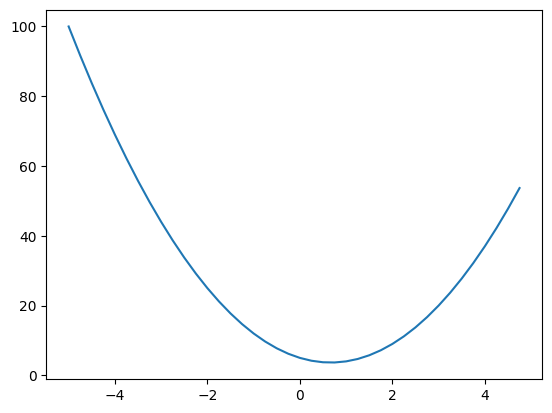

In [766]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [767]:
h = 0.0000000000001
x = 3.0
(f(x + h) - f(x))/ h

13.997691894473974

In [768]:
h = 0.0000000000001
x = -3.0
(f(x + h) - f(x))/ h

-21.955770534987096

In [769]:
h = 0.0000000000001
x = 2/3
(f(x + h) - f(x))/ h

-0.004440892098500626

In [770]:
a = 2.0
b = -3.0
c = 10.0
d = a*b+c
d

4.0

In [771]:
h = 0.0001
a = 2.0
b = -3.0
c = 10.0

d1 = a*b+c
a += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)


d1 4.0
d2 3.999699999999999
slope -3.000000000010772


In [772]:
h = 0.0001
a = 2.0
b = -3.0
c = 10.0

d1 = a*b+c
b += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)


d1 4.0
d2 4.0002
slope 2.0000000000042206


In [773]:
h = 0.0001
a = 2.0
b = -3.0
c = 10.0

d1 = a*b+c
c += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)


d1 4.0
d2 4.0001
slope 0.9999999999976694


In [774]:
class Value:

  def __init__(self, data, _children = (), _op = '', label = '') -> None:
    self.data = data
    self._prev = set(_children)
    self._op = _op
    self.label = label
    self.grad = 0.0
    self._backward = lambda: None

  def __repr__(self):
    return f"Value(data)={self.data}"

  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, (self, other), '+')
    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward
    return out

  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), '*')
    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward
    return out

  def __rmul__(self, other):
    return self * other

  def __radd__(self, other):
    return self + other


  def __sub__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    return self + (-other)

  def __rsub__(self, other):
      other = other if isinstance(other, Value) else Value(other)
      return other + (-self)

  def __neg__(self):
      return self * -1

  def __truediv__(self, other):
    return self * other**-1

  def __pow__(self, other):
    assert isinstance(other, (int, float))
    out = Value(self.data**other, (self,), f'**{other}')
    def _backward():
      self.grad += other*self.data**(other - 1) * out.grad
    out._backward = _backward
    return out

  def exp(self):
    x = self.data
    out = Value(math.exp(x), (self, ), 'exp')

    def _backward():
      self.grad += out.grad * out.data
    out._backward = _backward

    return out

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), _op = 'tanh')

    def _backward():
      self.grad += (1 - t ** 2) * out.grad
    out._backward = _backward
    return out

  def backward(self):
    topo = []
    vis = set()
    def build_topo(v):
      if v not in vis:
        vis.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad = 1.0
    for node in reversed(topo):
      node._backward()




a = Value(2.0, label = 'a')
b = Value(-3.0, label = 'b')
c = Value(10.0, label = 'c')
e = a*b; e.label = 'e'
d = e + c
d.label = 'd'
#(a.__mul__(b)).__add__(c)
f = Value(-2.0, label = 'f')
l = d * f
l.label = 'l'

In [775]:
a = Value(8.0)
b = Value(2.0)
a/b

Value(data)=4.0

In [776]:
d._prev

{Value(data)=-6.0, Value(data)=10.0}

In [777]:
d._op

'+'

In [778]:
from graphviz import Digraph

def trace(root):
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format = 'svg', graph_attr={'rankdir': 'LR'})

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    dot.node(name = uid, label = "{%s | data %.4f | grad %.4f}" %(n.label, n.data, n.grad), shape = 'record')
    if n._op:
      dot.node(name = uid + n._op, label = n._op)
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

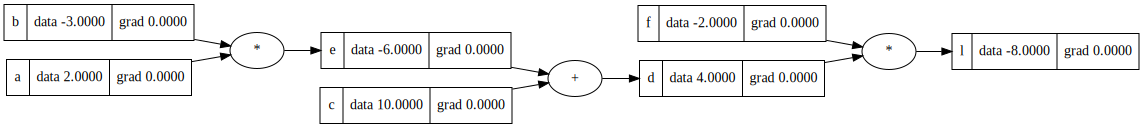

In [779]:
draw_dot(l)

L = d + f

dL/dd = f

(f(x + h) - f(x)) / h

((d + h)*f - d*f) / h

(h*f)/h

f


In [780]:
l.grad = 1.0

In [781]:
d.grad = f.data
f.grad = d.data

dL/dc = dL/dd * dd/dc

dd/dc = ?

d = c + e

dd/dc = 1.0

dd/de = 1.0

In [782]:
c.grad = -2.0
e.grad = -2.0

In [783]:
a.grad = 6.0
b.grad = -4.0

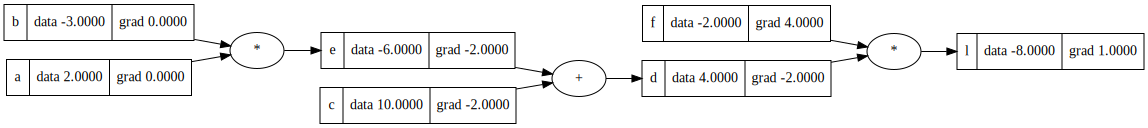

In [784]:
draw_dot(l)

In [785]:
a.data += 0.01 * a.data
b.data += 0.01 * b.data
c.data += 0.01 * c.data
f.data += 0.01 * f.data

e = a * b
d = e + c
L = d * f

print(L.data)

-53.371632


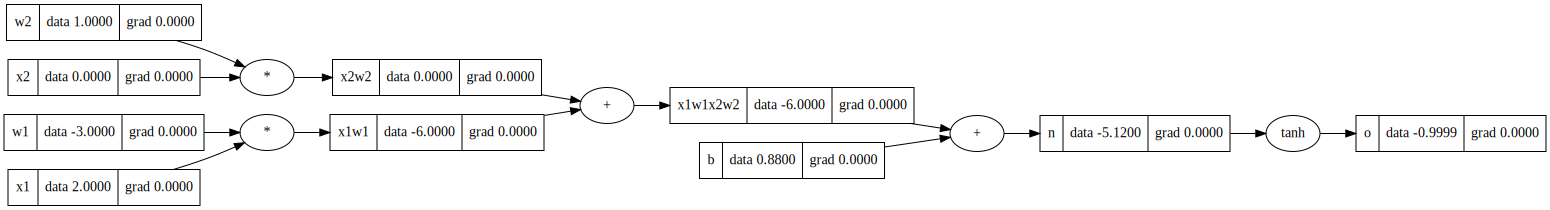

In [786]:
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')

w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')

b = Value(0.88, label = 'b')

x1w1 = x1*w1; x1w1.label = 'x1w1'
x2w2 = x2*w2; x2w2.label = 'x2w2'
x1w1x2w2 = x1w1+x2w2; x1w1x2w2.label = 'x1w1x2w2'

n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
draw_dot(o)

In [787]:
o.grad = 1.0

In [788]:
# o = tanh(n)
#do/dn = 1 - tanh(n)^2

o.data

-0.999928576851441

In [789]:
n.grad = 1 - o.data**2

In [790]:
n.grad

0.0001428411958518394

In [791]:
x1w1x2w2.grad = 0.5
b.grad = 0.5

In [792]:
x1w1.grad = 0.5
x2w2.grad = 0.5

In [793]:
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

In [794]:
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

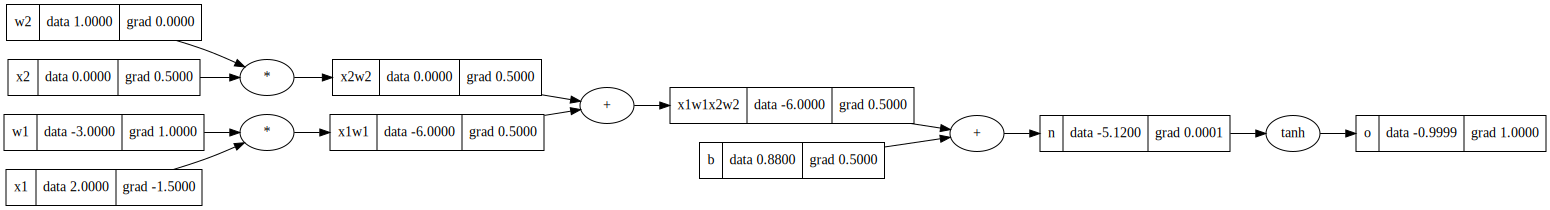

In [795]:
draw_dot(o)

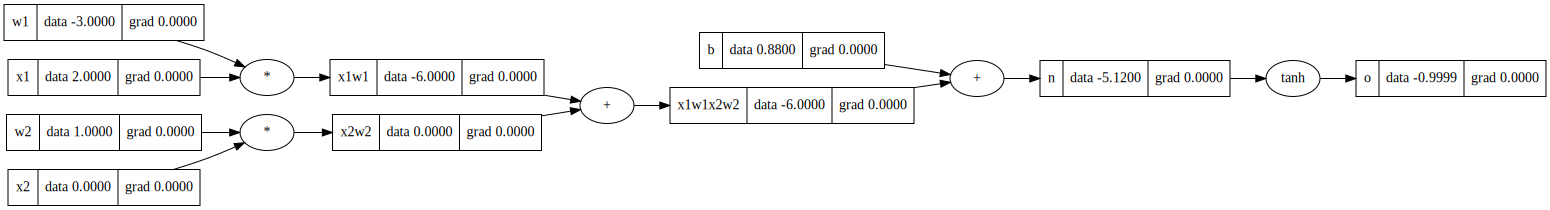

In [796]:
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')

w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')

b = Value(0.88, label = 'b')

x1w1 = x1*w1; x1w1.label = 'x1w1'
x2w2 = x2*w2; x2w2.label = 'x2w2'
x1w1x2w2 = x1w1+x2w2; x1w1x2w2.label = 'x1w1x2w2'

n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
draw_dot(o)

In [797]:
o.backward()

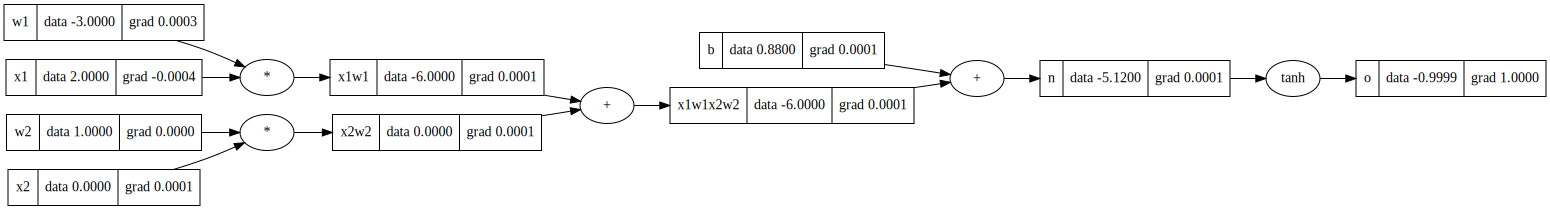

In [798]:
draw_dot(o)

In [799]:
o.grad = 1.0

In [800]:
o._backward()

In [801]:
n._backward()

In [802]:
b._backward()

In [803]:
x1w1x2w2._backward()
x2w2._backward()
x1w1._backward()

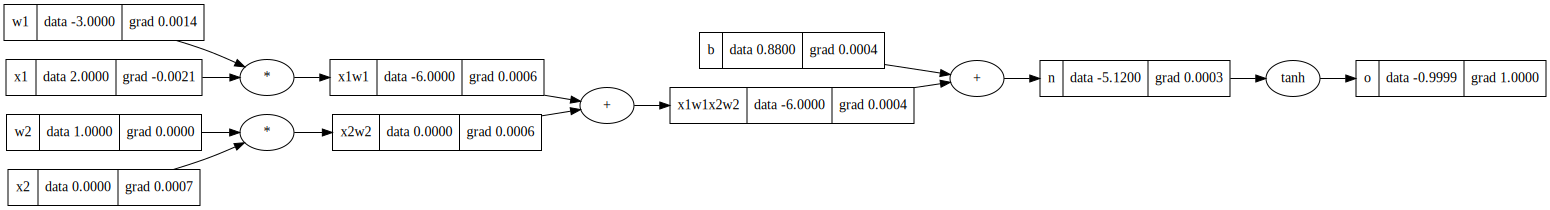

In [804]:
draw_dot(o)

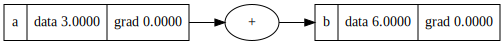

In [805]:
a = Value(3.0, label = 'a')
b = a + a; b.label = 'b'
draw_dot(b)

In [806]:
b.backward()

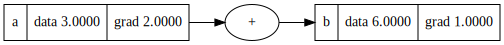

In [807]:
draw_dot(b)

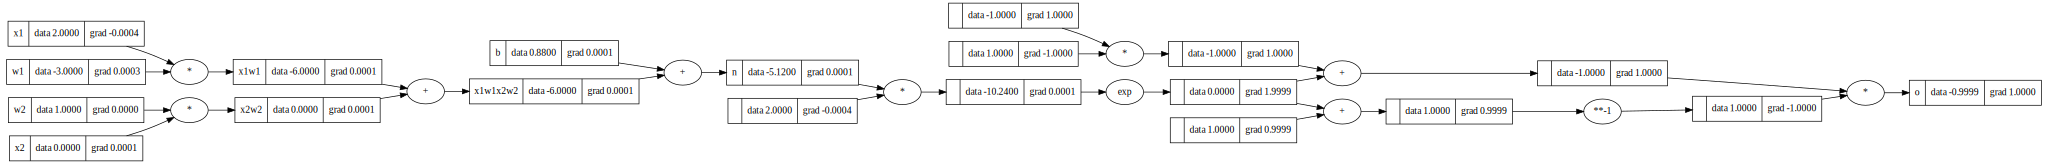

In [808]:
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')

w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')

b = Value(0.88, label = 'b')

x1w1 = x1*w1; x1w1.label = 'x1w1'
x2w2 = x2*w2; x2w2.label = 'x2w2'
x1w1x2w2 = x1w1+x2w2; x1w1x2w2.label = 'x1w1x2w2'

n = x1w1x2w2 + b; n.label = 'n'
e = (2*n).exp()
o = (e - 1)/(e + 1)
o.label = 'o'
o.backward()
draw_dot(o)

In [809]:
import torch

In [810]:
x1 = torch.Tensor([2.0]).double()           ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()           ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()           ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()           ; w2.requires_grad = True

b = torch.Tensor([6.88137]).double()           ; b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('x1', x1.grad.item())
print('x2', x2.grad.item())
print('w1', w1.grad.item())
print('w2', w2.grad.item())


0.7071050214706146
x1 -1.500007465833125
x2 0.5000024886110417
w1 1.0000049772220834
w2 0.0


In [811]:
import random

In [812]:
class Neuron:

  def __init__(self, nin):
    self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
    self.b = Value(random.uniform(-1,1))

  def __call__(self, x):
    act = sum((wi*xi for wi,xi in zip(self.w, x)), self.b)
    out = act.tanh()
    return out

  def parameters(self):
    return self.w +[self.b]

class Layer:

  def __init__(self, nin, nout):
    self.neurons = [Neuron(nin) for _ in range(nout)]

  def __call__(self, x):
    outs = [n(x) for n in self.neurons]
    return outs[0] if len(outs) == 1 else outs

  def parameters(self):
    return [p for neuron in self.neurons for p in neuron.parameters()]

class MLP:

  def __init__(self, nin, nouts):
    sz = [nin] + nouts
    self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

  def __call__(self, x):
    for layer in self.layers:
      x = layer(x)
    return x

  def parameters(self):
    return [p for layer in self.layers for p in layer.parameters()]




In [813]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

Value(data)=0.5595438334252679

In [814]:
n.parameters()

[Value(data)=-0.11759110806672446,
 Value(data)=0.9406190778623909,
 Value(data)=-0.7644415792501957,
 Value(data)=0.8949408000618015,
 Value(data)=-0.9584109669446315,
 Value(data)=-0.866006662268225,
 Value(data)=0.5755396460317366,
 Value(data)=-0.7209775181903548,
 Value(data)=-0.9762327827644484,
 Value(data)=-0.6393333335084264,
 Value(data)=-0.578864891937072,
 Value(data)=-0.9960597389886721,
 Value(data)=0.37790614397871614,
 Value(data)=0.13161214738970006,
 Value(data)=-0.10021770324307466,
 Value(data)=-0.8344097706154336,
 Value(data)=0.23942837297581887,
 Value(data)=0.8900894431281252,
 Value(data)=0.05337669034639947,
 Value(data)=-0.5217493574980918,
 Value(data)=0.9748551227087461,
 Value(data)=0.9330418844548793,
 Value(data)=0.4195038745802726,
 Value(data)=-0.9908533867185687,
 Value(data)=0.5820069316960925,
 Value(data)=-0.8754927995097301,
 Value(data)=0.5565319524945345,
 Value(data)=-0.14470461517683497,
 Value(data)=-0.8685538613311661,
 Value(data)=0.3547438

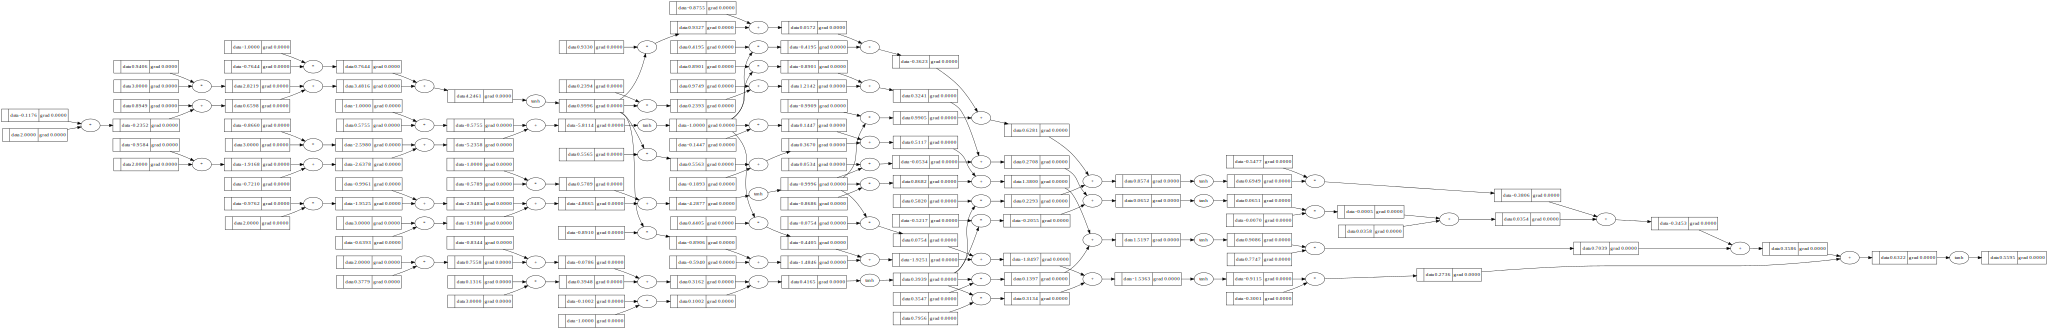

In [815]:
draw_dot(n(x))

In [816]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]

ys = [1.0, -1.0, -1.0,1.0]

ypred = [n(x) for x in xs]

In [817]:
ypred

[Value(data)=0.5595438334252679,
 Value(data)=0.6916676198223035,
 Value(data)=0.6938610962722916,
 Value(data)=0.6348643697609763]

In [818]:
loss = sum([(yout- ygt)**2 for ygt, yout in zip(ys, ypred)])
loss

Value(data)=6.058230412563784

In [819]:
loss.backward()

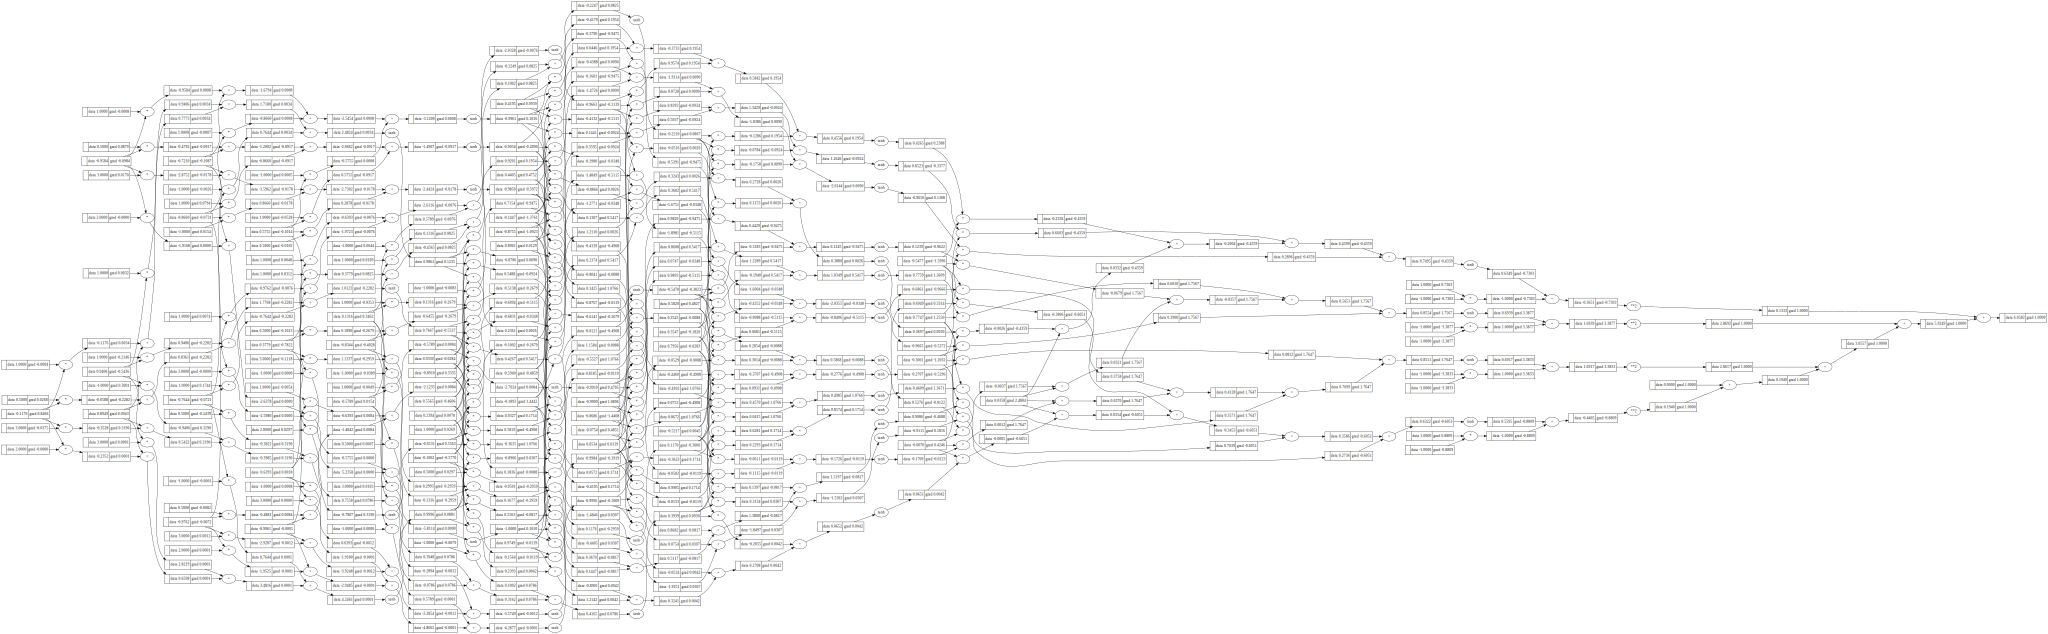

In [820]:
draw_dot(loss)

In [821]:
n.layers[0].neurons[0].w[0].grad

0.8465740030108685

In [822]:
n.layers[0].neurons[0].w[0].data

-0.11759110806672446

In [823]:
for p in n.parameters():
  p.data += -0.01 * p.grad

In [824]:
n.layers[0].neurons[0].w[0].data

-0.12605684809683315

In [825]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]

ys = [1.0, -1.0, -1.0,1.0]



In [826]:
ypred = [n(x) for x in xs]
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
loss

Value(data)=5.801427923604453

In [827]:
ypred = [n(x) for x in xs]
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
loss

Value(data)=5.801427923604453

In [828]:
loss.backward()

In [829]:
for p in n.parameters():
  p.data += -0.01 *p.grad

In [830]:
ypred

[Value(data)=0.5238539059438171,
 Value(data)=0.638231398639596,
 Value(data)=0.6512448912220015,
 Value(data)=0.5946593846601502]

In [831]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]

ys = [1.0, -1.0, -1.0,1.0]


In [832]:
for k in range(20):
  #forward pass
  ypred = [n(x) for x in xs]
  loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))


  #backward pass
  for p in n.parameters():
    p.grad = 0.0

  loss.backward()

  #update
  for p in n.parameters():
    p.data += -0.05*p.grad

  print(k, loss.data)

0 5.237925646340763
1 3.7603183176928487
2 2.9024831361776293
3 2.4956024226182807
4 2.192178964631895
5 1.8691335881043267
6 1.501204781806284
7 1.120910124057225
8 0.7916245417224844
9 0.5527118376075901
10 0.39695952025362674
11 0.29775798059237746
12 0.23290479464219782
13 0.18867890825326655
14 0.15721177251573468
15 0.13396482867380646
16 0.1162331344578448
17 0.10234008659913664
18 0.09120589983392882
19 0.08211039795872024


In [833]:
ypred

[Value(data)=0.8948352001802878,
 Value(data)=-0.9084431717642266,
 Value(data)=-0.8159562705790453,
 Value(data)=0.8303061117723104]